This notebook deals about how to find the similarity between several documents as the corpus. Corpus contains several PDF documents. Firstly, these documents are converted to text format.

In [4]:
library(tm)#tm is using performing the text mining
library(pdftools)#pdftools is used to perform pdf related operations

Warning message:
"package 'pdftools' was built under R version 3.3.3"

In [10]:
for(i in 1:131){
  filename<-paste("A:/My Initiatives/MachineLearning with R and Python/NLP/", toString(i), sep="")
  filename<-paste(filename,".pdf", sep="")
  txt=pdf_text(filename)
  output<-paste("C:/Users/bhark/Pdf/", toString(i), sep="")
  write(txt, file=paste(output,".txt", sep=""), append = FALSE)
}

The above code converts all the 131 pdf documents into  text format that which I took as corpus. For specifying the entire path, paste() is used.

In [11]:
mycorpus<-Corpus(DirSource("C:/Users/bhark/Pdf"))# Loading all the text documents that are present at source.

Now some preprocessing should be done on corpus like removing numbers, punctuations, stop words, white spaces and also perform stemming 

In [13]:
replacePunctuation<-function(x){
    gsub("[[:punct:]]+", " ", x)
}

The above function removes all the punctuations and replace those with white spaces.

In [15]:
clean_corpus<-tm_map(mycorpus, content_transformer(replacePunctuation))#removes punctuations
clean_corpus<-tm_map(clean_corpus, content_transformer(tolower))#transform all text into lower case
clean_corpus<-tm_map(clean_corpus, removeNumbers)#removes numbers
clean_corpus<-tm_map(clean_corpus, removeWords, stopwords("english"))#remove stopwords like the, is etc
clean_corpus<-tm_map(clean_corpus, stemDocument) #Performs the stemming for document
clean_corpus<-tm_map(clean_corpus, stripWhitespace)#removes the white space

In [16]:
dtm<-DocumentTermMatrix(clean_corpus)#Building the Document Term matrix
dtm_matrix<-as.matrix(dtm)#Converting te Document Term matrix into data of matrix

In [17]:
str(dtm)

List of 6
 $ i       : int [1:66682] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:66682] 1 2 3 4 5 6 7 8 9 10 ...
 $ v       : num [1:66682] 2 3 2 14 4 9 1 1 5 1 ...
 $ nrow    : int 131
 $ ncol    : int 6724
 $ dimnames:List of 2
  ..$ Docs : chr [1:131] "1.txt" "10.txt" "100.txt" "101.txt" ...
  ..$ Terms: chr [1:6724] "abid" "academ" "accept" "access" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [18]:
dtm

<<DocumentTermMatrix (documents: 131, terms: 6724)>>
Non-/sparse entries: 66682/814162
Sparsity           : 92%
Maximal term length: 27
Weighting          : term frequency (tf)

In [19]:
dtm_matrix

,abid,academ,accept,access,accompani,accord,accru,accuraci,acknowledg,acquiesc,...,today,transmat,tranzmat,trend,trip,undergo,violenc,wisdom,ziona,â€œmobil
1.txt,2,3,2,14,4,9,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
10.txt,0,0,4,3,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100.txt,0,0,10,4,3,5,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
101.txt,0,0,10,1,5,4,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
102.txt,0,0,3,11,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
103.txt,0,0,0,3,2,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
104.txt,0,0,5,2,0,2,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
105.txt,0,0,3,7,6,16,0,1,8,0,...,0,0,0,0,0,0,0,0,0,0
106.txt,0,0,4,0,1,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
107.txt,0,0,1,5,2,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calculate the Cosine similarity of the each document

In [20]:
cosine_similarity<-matrix(nrow=131, ncol=131)#initialize a matrix with 131 rows and 131 columns so
#that all the similarities can be placed in this matrix

In [24]:
install.packages("lsa", repos="https://cran.r-project.org/")#installing and loading the Latent Semantic Analysis package
library(lsa)

Installing package into 'C:/Users/bhark/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'lsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bhark\AppData\Local\Temp\RtmpiYsJBl\downloaded_packages


Warning message:
"package 'lsa' was built under R version 3.3.3"Loading required package: SnowballC


In [26]:
for(i in 1:131){
  for(j in 1:131){
    cosine_similarity[i,j]<-lsa::cosine(dtm_matrix[i,], dtm_matrix[j,])
  }
}
#Loops through the all the 131 documents and finds the similarity of each document with each other document

In [28]:
cosine_similarity

1.0000000,0.5986762,0.5185634,0.5246677,0.5094565,0.5563365,0.4260703,0.6032661,0.6156825,0.4928417,...,0.6162100,0.5440507,0.5819911,0.4801123,0.5439851,0.6212559,0.4952607,0.4322958,0.5862546,0.3461748
0.5986762,1.0000000,0.6252261,0.7850441,0.7656266,0.6823972,0.6223980,0.7050036,0.8035861,0.4493587,...,0.5095522,0.7713186,0.6907893,0.4591680,0.7207939,0.5889509,0.3999524,0.5826902,0.8003297,0.3167252
0.5185634,0.6252261,1.0000000,0.6307392,0.6221480,0.6071941,0.5440689,0.6552617,0.7117798,0.4919406,...,0.4406097,0.6722937,0.6879689,0.4101671,0.6245523,0.6134102,0.3151068,0.5512539,0.6477544,0.3021750
0.5246677,0.7850441,0.6307392,1.0000000,0.8177932,0.6984246,0.6543650,0.7004098,0.8115925,0.4555214,...,0.4793855,0.7694869,0.7054448,0.4689960,0.7557919,0.5527396,0.4397221,0.6137166,0.8154943,0.3466244
0.5094565,0.7656266,0.6221480,0.8177932,1.0000000,0.6769780,0.6293913,0.6817969,0.7726017,0.4472770,...,0.4525271,0.7398193,0.6773843,0.5489031,0.7263134,0.5437452,0.4265997,0.5928680,0.8052562,0.3677069
0.5563365,0.6823972,0.6071941,0.6984246,0.6769780,1.0000000,0.5932926,0.6903344,0.7884105,0.5334338,...,0.4710836,0.7087616,0.7246250,0.4412058,0.6281143,0.5985648,0.3819687,0.6041076,0.7006407,0.3435911
0.4260703,0.6223980,0.5440689,0.6543650,0.6293913,0.5932926,1.0000000,0.6872520,0.7017356,0.3984771,...,0.3759278,0.6491304,0.6061740,0.3905294,0.5773181,0.5818778,0.3526191,0.6033413,0.6257756,0.2766504
0.6032661,0.7050036,0.6552617,0.7004098,0.6817969,0.6903344,0.6872520,1.0000000,0.7995701,0.4952570,...,0.5075014,0.7222757,0.7378744,0.4656324,0.6654090,0.6398292,0.3939954,0.6186954,0.7165429,0.3495425
0.6156825,0.8035861,0.7117798,0.8115925,0.7726017,0.7884105,0.7017356,0.7995701,1.0000000,0.6061879,...,0.5209615,0.8356603,0.7707782,0.5104104,0.7789204,0.6642211,0.3873040,0.6854275,0.8174105,0.3546190
0.4928417,0.4493587,0.4919406,0.4555214,0.4472770,0.5334338,0.3984771,0.4952570,0.6061879,1.0000000,...,0.3787246,0.4619948,0.5254107,0.4328839,0.4184446,0.5250046,0.3712276,0.4612068,0.4513843,0.3763302
0.3890417,0.5709852,0.5079558,0.5563665,0.5516133,0.5765690,0.5533491,0.6058579,0.6444381,0.4157789,...,0.3321491,0.5559333,0.5872400,0.3819074,0.5474000,0.4882413,0.3685170,0.5748694,0.5564534,0.3318410


Let's examine the simialrity martrix by uisng the heat map

In [30]:
install.packages("gplots", repos="https://cran.r-project.org/")
library(gplots)#installing and loading the gplots package for the purpose of heaat map.

Installing package into 'C:/Users/bhark/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bhark\AppData\Local\Temp\RtmpiYsJBl\downloaded_packages


Warning message:
"package 'gplots' was built under R version 3.3.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [31]:
colors<-colorRampPalette(c("blue", "green"))# Defining the colors needed

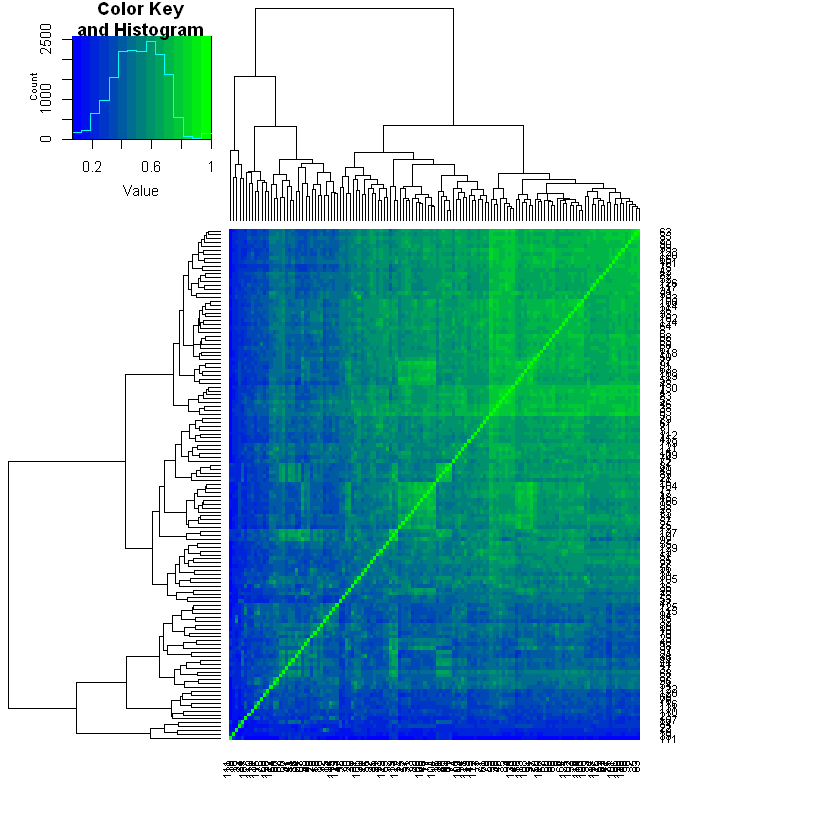

In [32]:
heatmap.2(cosine_similarity,col = colors, margins=c(5,10), trace="none")

Since Cosine of zero is one. We can say two documents are similar if their cosine similarity value tends to one. We can see a diagonal line in green color. From the key, this shows that as the color changes from blue to green the similarity of documents will become close to one. Since the document finds the similarity with itself thier similarity will be one, and hence the diagonal is much greener. We can also look at the dendograms which leads to formming the clusters of similar documents